In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

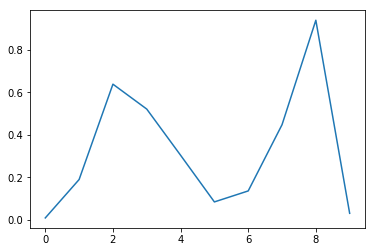

In [5]:
plt.plot(np.random.random(10))